In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Data Loading & Explore the data

In [220]:
df = pd.read_csv('/kaggle/input/playground-series-s3e9/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s3e9/test.csv')
submission = pd.read_csv('/kaggle/input/playground-series-s3e9/sample_submission.csv')

In [221]:
# Train data
print(df.shape,"\n") # X in R^8 (id colum is just index), y in R^1, # of data : 5407
print(df.info(),"\n") # age in days : int64, others: float64
print(df.isnull().sum(),"\n") # no nulls :-) 
df.describe()

(5407, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         5407 non-null   int64  
 1   CementComponent            5407 non-null   float64
 2   BlastFurnaceSlag           5407 non-null   float64
 3   FlyAshComponent            5407 non-null   float64
 4   WaterComponent             5407 non-null   float64
 5   SuperplasticizerComponent  5407 non-null   float64
 6   CoarseAggregateComponent   5407 non-null   float64
 7   FineAggregateComponent     5407 non-null   float64
 8   AgeInDays                  5407 non-null   int64  
 9   Strength                   5407 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 422.5 KB
None 

id                           0
CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent           

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000
mean,2703.000000,299.168189,58.610579,31.872795,185.076235,4.108441,992.000718,771.219974,51.751618,35.452071
std,1561.010784,105.537682,83.417801,54.605003,18.517583,5.692296,77.148010,78.725253,70.006975,16.401896
min,0.000000,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,1351.500000,213.700000,0.000000,0.000000,175.100000,0.000000,938.200000,734.300000,7.000000,23.640000
50%,2703.000000,297.200000,0.000000,0.000000,187.400000,0.000000,978.000000,781.200000,28.000000,33.950000
75%,4054.500000,375.000000,122.600000,79.000000,192.000000,8.050000,1047.000000,821.000000,56.000000,45.850000
max,5406.000000,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [222]:
# Test data
print(df_test.shape,"\n") # X in R^8 (id colum is just index), y none, # of data : 3605
print(df_test.info(),"\n") # age in days : int64, others: float64
print(df_test.isnull().sum(),"\n") # no nulls :-) 
df_test.describe()

(3605, 9) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3605 non-null   int64  
 1   CementComponent            3605 non-null   float64
 2   BlastFurnaceSlag           3605 non-null   float64
 3   FlyAshComponent            3605 non-null   float64
 4   WaterComponent             3605 non-null   float64
 5   SuperplasticizerComponent  3605 non-null   float64
 6   CoarseAggregateComponent   3605 non-null   float64
 7   FineAggregateComponent     3605 non-null   float64
 8   AgeInDays                  3605 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 253.6 KB
None 

id                           0
CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateCompon

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
count,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000
mean,7209.000000,299.943523,55.803273,32.829154,184.345825,4.194230,990.222330,774.736311,49.153398
std,1040.818188,104.809283,80.938863,55.490684,17.964842,5.807567,76.812197,77.412505,63.564334
min,5407.000000,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000
25%,6308.000000,213.800000,0.000000,0.000000,174.900000,0.000000,938.200000,739.300000,7.000000
50%,7209.000000,300.000000,0.000000,0.000000,188.500000,0.000000,977.600000,781.500000,28.000000
75%,8110.000000,374.000000,117.200000,90.000000,192.000000,8.100000,1047.000000,821.000000,56.000000
max,9011.000000,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000


In [223]:
# Function for Data preprocessing

def DataPreprocessing(X):
    # id to column
    X = X.set_index('id', inplace=True)
    return X

In [224]:
# Applying data preprocessing
DataPreprocessing(df)
DataPreprocessing(df_test)

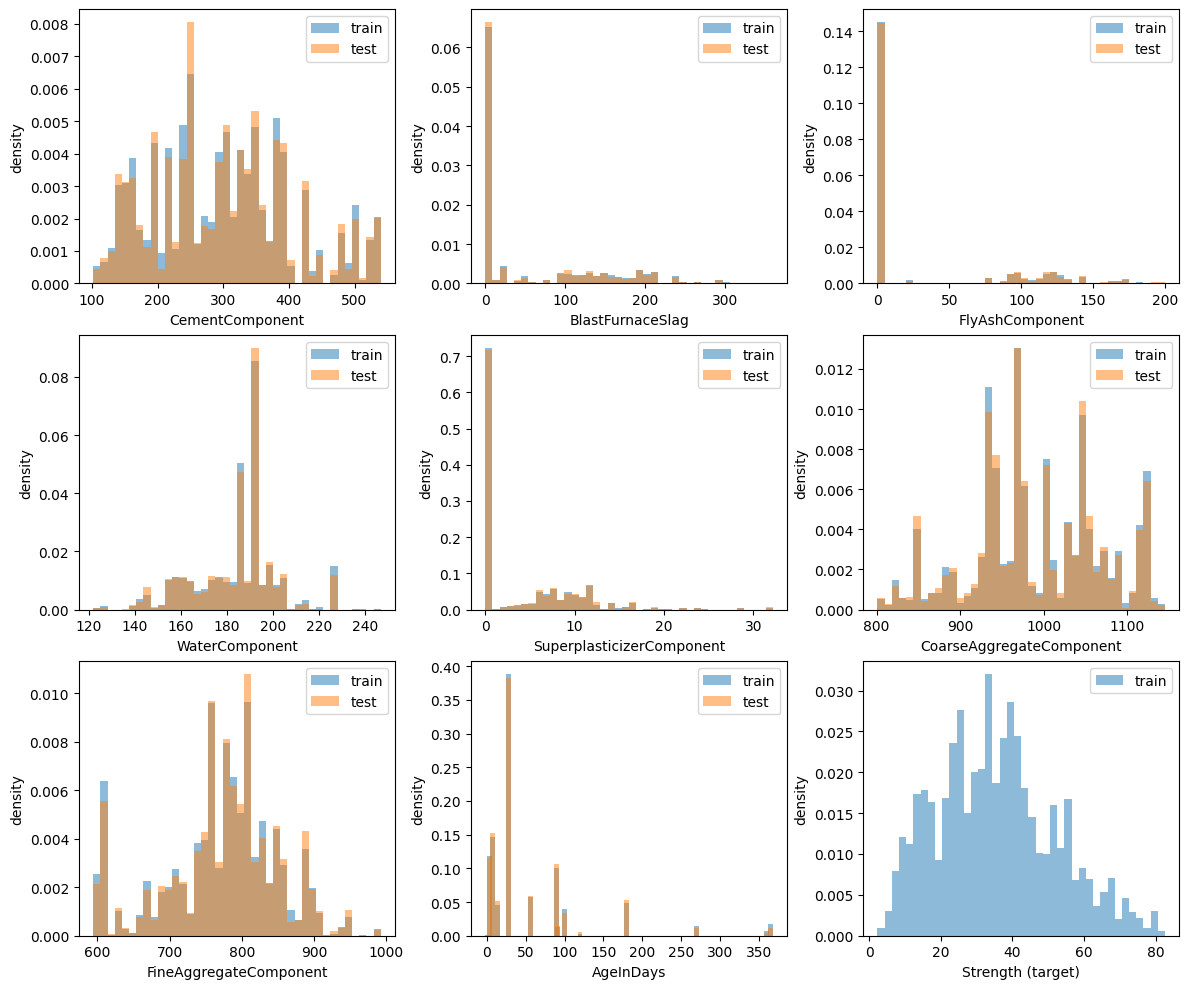

In [225]:
# Visualization

target = 'Strength'
def analyze(train, test, col, ax):
    bins = 40
    column = train[col]
    if col in test.columns:
        both = np.hstack([column.values, test[col].values])
    else:
        both = column
    uni = np.unique(column)
    unival = len(uni)
    if unival < bins:
        vc_tr = column.value_counts().sort_index() / len(train)
        if col in test.columns:
            vc_te = test[col].value_counts().sort_index() / len(test)
            ax.bar(vc_tr.index, vc_tr, width=6, label='train', alpha=0.5)
            ax.bar(vc_te.index, vc_te, width=6, label='test', alpha=0.5)
        else:
            ax.bar(vc_tr.index, vc_tr, label='train', alpha=0.5)
        if unival <= 12:
            ax.set_xticks(vc_tr.index)
        else:
            ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # only integer labels
        ax.set_xlabel(col + (' (target)' if col == target else ''))
        ax.set_ylabel('density')
        ax.legend()
    else:
        hist_bins = np.linspace(both.min(), both.max(), bins+1)
        ax.hist(column, bins=hist_bins, density=True, label='train', alpha=0.5)
        if col in test.columns:
            ax.hist(test[col], bins=hist_bins, density=True, label='test', alpha=0.5)
        ax.set_xlabel(col + (' (target)' if col == target else ''))
        ax.set_ylabel('density')
        ax.legend()

        
_, axs = plt.subplots(3, 3, figsize=(12, 10))
axs = axs.ravel()
for col, ax in zip(df.columns, axs):
    analyze(df, df_test, col, ax)
plt.tight_layout(h_pad=0.5, w_pad=0.5)
plt.show()

In [226]:
# Correlation
correlation_matrix = df.corr()
correlation_matrix['Strength'].sort_values(ascending = False)

Strength                     1.000000
AgeInDays                    0.334204
SuperplasticizerComponent    0.208249
CementComponent              0.158000
BlastFurnaceSlag             0.057506
FlyAshComponent              0.031606
FineAggregateComponent      -0.073900
CoarseAggregateComponent    -0.098410
WaterComponent              -0.113678
Name: Strength, dtype: float64

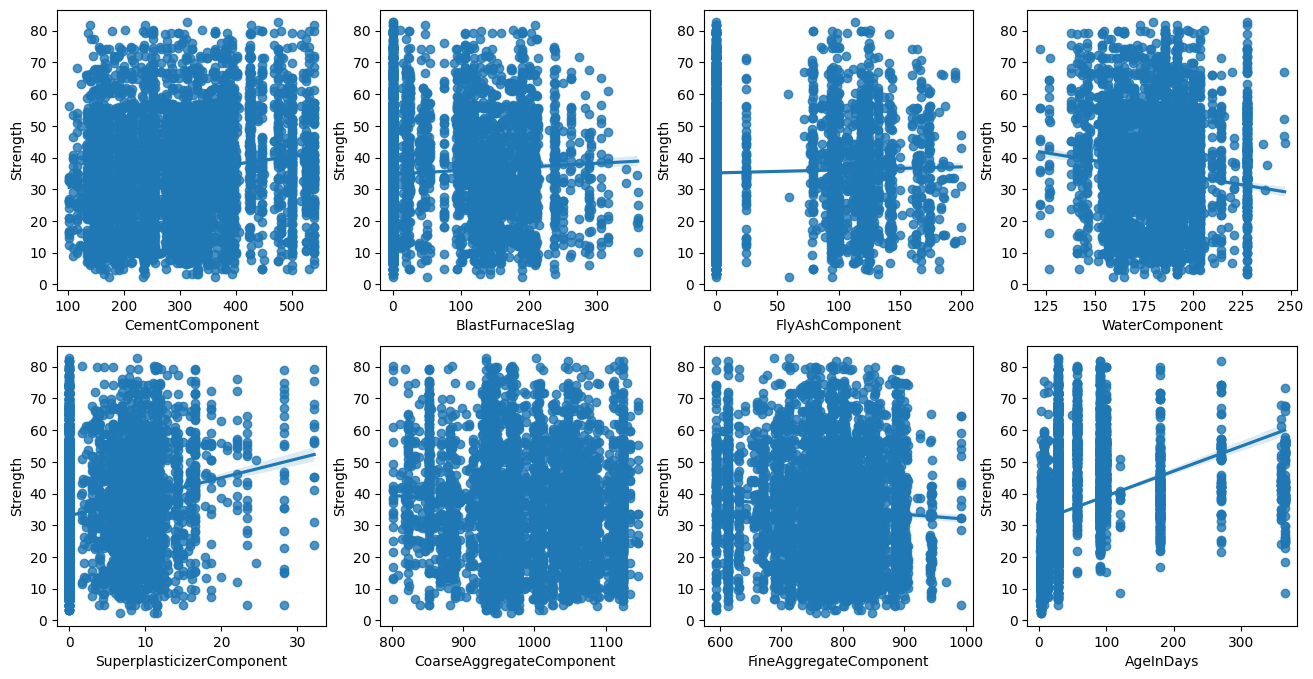

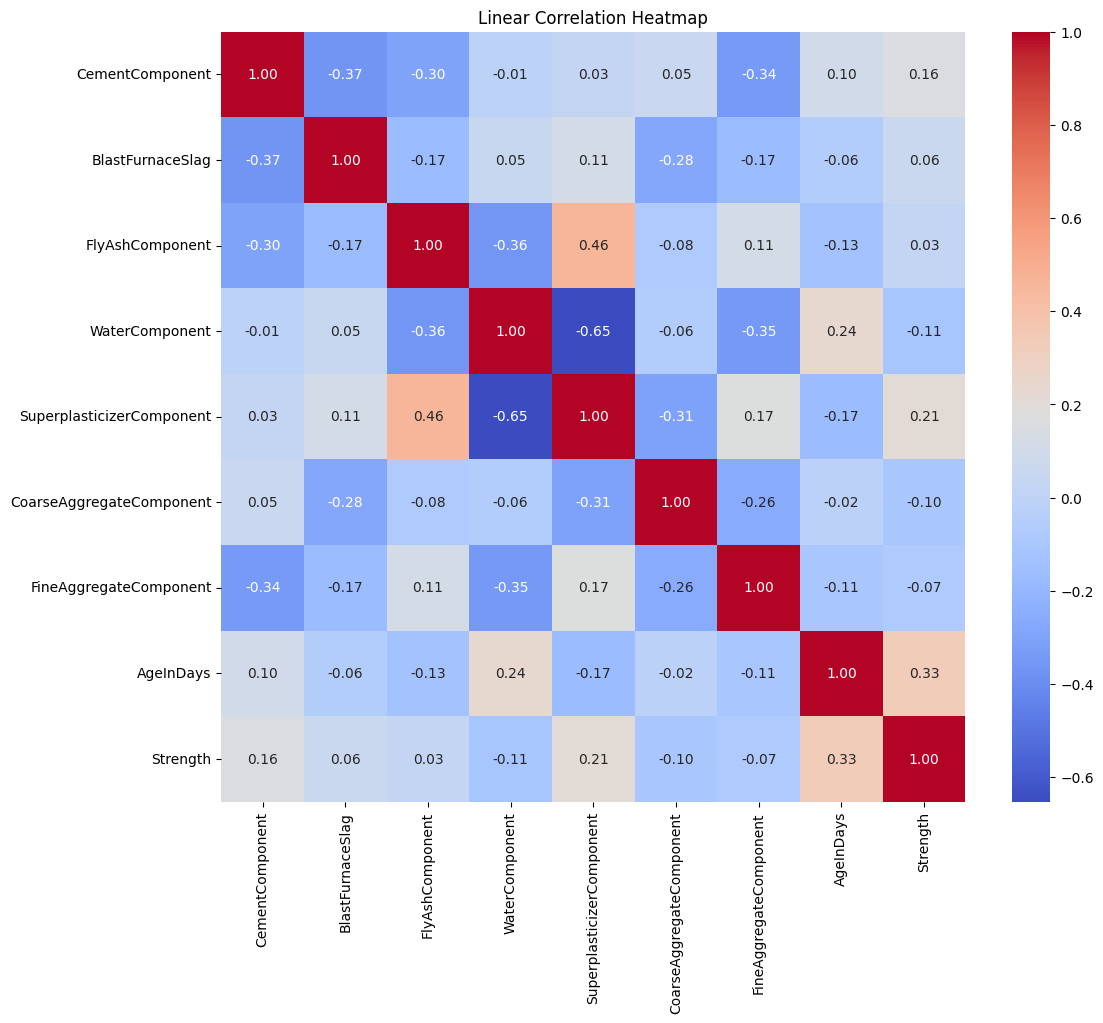

In [227]:
# Correlation

fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)
feats = ['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays']

for idx, feat in enumerate(feats):
  # 회귀선 + 데이터포인트
  sns.regplot(x = feat, y = df.Strength, data = df, 
              ax = axs[int(idx/4)][ idx % 4  ])

plt.show()


# Correlation: Heat map

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Linear Correlation Heatmap')
plt.show()

In [228]:
# 특정 컬럼간의 비율(나누거나 곱하거나 등)이 strength와 상관관계가 있을 수도 있다.

# Train/Valid

In [229]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Strength'])
y = df['Strength']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_test = df_test

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape, X_test.shape

((4325, 8), (1082, 8), (4325,), (1082,), (3605, 8))

In [230]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
# X_valid_scaled = scaler_X.transform(X_valid) 
print(X_train_scaled.shape)
print(X_train_scaled)

(4325, 8)
[[-0.20958166 -0.70254477  1.2016555  ... -0.23679733  1.32978384
  -0.34002616]
 [ 1.1896904   0.57342281 -0.58087946 ... -0.7267959   0.41528822
  -0.63798249]
 [ 0.59932815  1.56610878 -0.58087946 ... -0.61431601 -0.19395156
   0.55384284]
 ...
 [ 2.27769774 -0.70254477 -0.58087946 ...  1.71673257 -2.00768001
  -0.63798249]
 [ 1.8992604   1.1339843  -0.58087946 ...  1.71673257 -2.01022381
   1.81661015]
 [-0.12254107  1.70894993 -0.58087946 ...  0.16011444  0.41528822
  -0.63798249]]


# Learning

## Linear Regression

In [231]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_lr = LinearRegression()
results_lr = model_lr.fit(X_train_scaled, y_train)

X_valid_scaled = scaler_X.transform(X_valid) # adjust scaler to X_validation
prediction = results_lr.predict(X_valid_scaled)

mse_lr = mean_squared_error(y_valid, prediction)
rmse_lr = np.sqrt(mse_lr)
print("Mean Squared Error_lr:", rmse_lr)

# Results : Mean Squared Error_lr: 14.397013420166472

Mean Squared Error_lr: 14.397013420166472


In [232]:
# Submission
X_test_scaled = scaler_X.transform(X_test) # adjust scaler to X_validation
prediction = results_lr.predict(X_test_scaled)
submission['Strength'] = prediction
submission.to_csv('submission_lr.csv', index = False)

# Results : Private-14.6926, Public-14.14148

## DecisionTree Regression

In [233]:
from sklearn.tree import DecisionTreeRegressor

model_dtr = DecisionTreeRegressor()
results_dtr = model_dtr.fit(X_train_scaled, y_train)

X_valid_scaled = scaler_X.transform(X_valid)
prediction = results_dtr.predict(X_valid_scaled)

mse_dtr = mean_squared_error(y_valid, prediction)
rmse_dtr = np.sqrt(mse_dtr)
print("Mean Squared Error_dtr:", rmse_dtr)

# Results : Mean Squared Error_dtr: 15.184002792823556

Mean Squared Error_dtr: 15.230907125830718


AgeInDays                    0.478458
CementComponent              0.104793
SuperplasticizerComponent    0.100832
CoarseAggregateComponent     0.086178
FineAggregateComponent       0.082917
WaterComponent               0.068300
BlastFurnaceSlag             0.051305
FlyAshComponent              0.027217
dtype: float64


<Axes: >

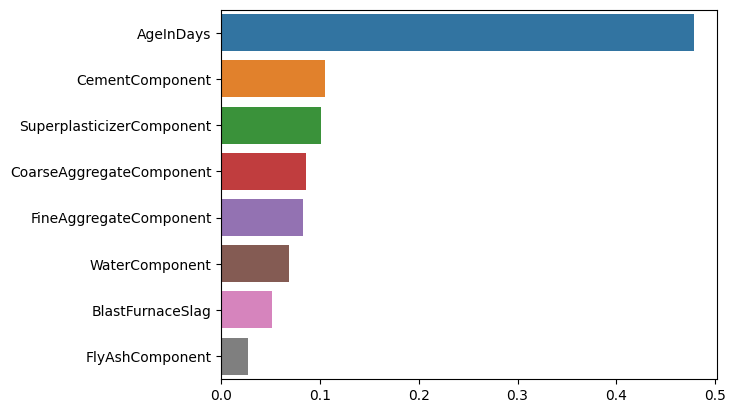

In [234]:
dtr_data = pd.Series(model_dtr.feature_importances_, X_train.columns)

dtr_data.sort_values(ascending = False, inplace = True) # inplace = True, 원본 수정

print(dtr_data)
sns.barplot( x = dtr_data, y = dtr_data.index)

## Cross validation

### CV: Linear Regressor

In [235]:
from sklearn.model_selection import cross_val_score

scores_lr = cross_val_score(model_lr, X_train_scaled, y_train, scoring = "neg_mean_squared_error", cv = 100)

X_valid_scaled = scaler_X.transform(X_valid) 
predictions_lr_cv = model_lr.predict(X_valid_scaled)

rmse_lr_cv = np.sqrt(mean_squared_error(y_valid, predictions_lr_cv))
print("Root Mean Squared Error_lr_cv:", rmse_lr_cv ) # Results : Root Mean Squared Error_lrcv: 14.397013420166472

Root Mean Squared Error_lr_cv: 14.397013420166472


### CV: Decision Tree Regressor

In [236]:
from sklearn.model_selection import cross_val_score

scores_dtr = cross_val_score(model_dtr, X_train_scaled, y_train, scoring = "neg_mean_squared_error", cv = 100)


X_valid_scaled = scaler_X.transform(X_valid)
predictions_dtr_cv = model_dtr.predict(X_valid_scaled)

rmse_dtr_cv = np.sqrt(mean_squared_error(y_valid, predictions_dtr_cv))
print("Root Mean Squared Error_dtr_cv:", rmse_dtr_cv ) # Results : Root Mean Squared Error_dtr_cv: 15.18400279282355

Root Mean Squared Error_dtr_cv: 15.230907125830718


## Ridge Model

In [237]:
from sklearn.linear_model import Ridge

alphas = [0, 1, 10, 100]

best_alpha = None
best_rmse = float('inf')

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores_ridge = cross_val_score(ridge, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=100)
    rmse_ridge = np.sqrt(-1 * scores_ridge.mean())
    print("Alpha:", alpha, "RMSE:", rmse_ridge)
    
    if rmse_ridge < best_rmse:
        best_rmse = rmse_ridge
        best_alpha = alpha

best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train_scaled, y_train)


X_valid_scaled = scaler_X.transform(X_valid)
predictions_ridge = best_ridge_model.predict(X_valid_scaled)

rmse_ridge = np.sqrt(mean_squared_error(y_valid, predictions_ridge))

print("Root Mean Squared Error_dtr_cv:", rmse_ridge ) # Results : Root Mean Squared Error_dtr_cv: 14.40781609820049

Alpha: 0 RMSE: 14.65178913686136
Alpha: 1 RMSE: 14.651772449291883
Alpha: 10 RMSE: 14.651636699707135
Alpha: 100 RMSE: 14.651560023397169
Root Mean Squared Error_dtr_cv: 14.40781609820049


## Ensemble

In [238]:
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor()
results_rfr = model_rfr.fit(X_train_scaled, y_train)

X_valid_scaled = scaler_X.transform(X_valid) # adjust scaler at X_validation
prediction = results_rfr.predict(X_valid_scaled)

mse_rfr = mean_squared_error(y_valid, prediction)
rmse_rfr = np.sqrt(mse_rfr)
print("Mean Squared Error_rfr:", rmse_rfr) # Result : Mean Squared Error_rfr: 12.519070905481474


Mean Squared Error_rfr: 12.4971908495068


In [239]:
# Submission
X_test_scaled = scaler_X.transform(X_test) # adjust scaler to X_validation
prediction = results_rfr.predict(X_test_scaled)
submission['Strength'] = prediction
submission.to_csv('submission_ESB.csv', index = False)

# Results : Private-13.19909, Public-13.09353

AgeInDays                    0.456909
CementComponent              0.113690
SuperplasticizerComponent    0.098021
CoarseAggregateComponent     0.089363
FineAggregateComponent       0.089112
WaterComponent               0.078283
BlastFurnaceSlag             0.044420
FlyAshComponent              0.030201
dtype: float64


<Axes: >

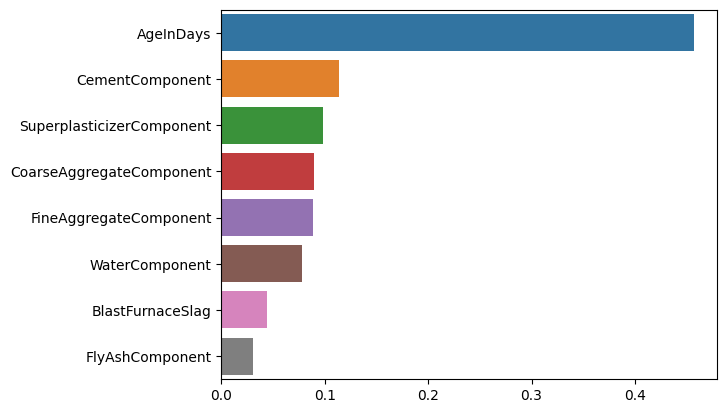

In [240]:
rfr_data = pd.Series(model_rfr.feature_importances_, index = X_train.columns)

rfr_data.sort_values(ascending = False, inplace = True) # inplace = True, 원본 수정

print(rfr_data)
sns.barplot( x = rfr_data, y = rfr_data.index)

# Model Fine Tunning

## 규제 기본 모델 + cv + grid search + 하이퍼파라미터

In [241]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [266]:
model_lasso = Lasso()
param_grid = {
    'max_iter':[1000, 2000, 3000],
    'alpha': 1/np.array([0.01, 0.1, 1, 2, 4, 8, 10, 100, 200, 300])
}


grid = GridSearchCV(model_lasso, param_grid, scoring = 'neg_root_mean_squared_error', cv=5, return_train_score = True)
grid.fit(X_train_scaled, y_train)

print(grid.best_params_, -1*grid.best_score_)

best_alpha = 1 / grid.best_params_['alpha']
best_max_iter = grid.best_params_['max_iter']

lasso_model = Lasso(alpha=best_alpha, max_iter=best_max_iter)
lasso_model.fit(X_train_scaled, y_train)

X_valid_scaled = scaler_X.transform(X_valid) # adjust scaler at X_validation
predictions_lsso_grid_cv = lasso_model.predict(X_valid_scaled)

rmse_grid_cv = np.sqrt(mean_squared_error(y_valid, predictions_lsso_grid_cv))

print("Root Mean Squared Error on Test Data:", rmse_grid_cv) # Results: Root Mean Squared Error on Test Data: 15.184002792823556

{'alpha': 0.0033333333333333335, 'max_iter': 1000} 14.644111368164914
Root Mean Squared Error on Test Data: 16.515054845839167


## 앙상블 + cv + grid search + 하이퍼파라미터

In [243]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

param_grid = {
    'n_estimators':[100, 200, 300],
    'random_state': [0, 20, 42]
}

grid = GridSearchCV(model, param_grid, scoring = 'neg_root_mean_squared_error', cv=5)
grid.fit(X_train_scaled, y_train)

print(grid.best_params_, -1*grid.best_score_)

best_n_estimators = grid.best_params_['n_estimators']
best_random_state = grid.best_params_['random_state']

model_grid_rfr = RandomForestRegressor(n_estimators=best_n_estimators, random_state=best_random_state)
model_grid_rfr.fit(X_train_scaled, y_train)

X_valid_scaled = scaler_X.transform(X_valid) # adjust scaler at X_validation
predictions_grid_ESB = model_grid_rfr.predict(X_valid_scaled) 

rmse_grid_ESB = np.sqrt(mean_squared_error(y_valid, predictions_grid_ESB))

print("Root Mean Squared Error on Validation Data:", rmse_grid_ESB) # Results: Root Mean Squared Error on Validation Data: 12.543941710180459

{'n_estimators': 100, 'random_state': 0} 13.110939103623831
Root Mean Squared Error on Validation Data: 12.543941710180459


In [244]:
# Submission
X_test_scaled = scaler_X.transform(X_test) # adjust scaler to X_validation
prediction = model_grid_rfr.predict(X_test_scaled)
submission['Strength'] = prediction
submission.to_csv('submission_grid_ESB.csv', index = False) # Results : Private-13.16903, Public-13.05355

## AutoML_파이캐럿

In [245]:
!pip install -q pycaret

In [246]:
!pip install -q catboost

In [247]:
!pip install --upgrade -q xgboost

In [248]:
from pycaret.regression import *

In [249]:
X_train_scaled_df = X_train
X_train_scaled_df.loc[:,:] = X_train_scaled
X_train_scaled_df

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
id,,,,,,,,
5173,-0.209582,-0.702545,1.201655,-1.328663,1.353045,-0.236797,1.329784,-0.340026
3288,1.189690,0.573423,-0.580879,-1.827492,2.550862,-0.726796,0.415288,-0.637982
1010,0.599328,1.566109,-0.580879,-1.095514,1.317815,-0.614316,-0.193952,0.553843
1029,0.470659,-0.702545,-0.580879,0.373864,-0.725520,0.708292,0.444542,-0.637982
4665,0.376050,-0.702545,-0.580879,0.644967,-0.725520,-0.313077,0.126567,-0.340026
...,...,...,...,...,...,...,...,...
3772,0.480120,-0.702545,-0.580879,0.048540,-0.725520,-0.235504,0.050253,0.057249
5191,-0.464081,1.299632,-0.580879,0.032274,-0.725520,1.543488,0.168540,-0.340026
5226,2.277698,-0.702545,-0.580879,-0.645483,-0.725520,1.716733,-2.007680,-0.637982


In [250]:
reg = setup(data = X_train_scaled_df, 
            target = y_train, 
            verbose = True, 
            train_size = 0.9, 
            data_split_shuffle = True, 
            normalize = True, 
            session_id = 100)

,Description,Value
0,Session id,100
1,Target,Strength
2,Target type,Regression
3,Original data shape,"(4325, 9)"
4,Transformed data shape,"(4325, 9)"
5,Transformed train set shape,"(3892, 9)"
6,Transformed test set shape,"(433, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [251]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [252]:
top6_models = compare_models(fold = 5, round = 3, n_select = 6, errors = 'ignore')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,9.409,149.611,12.228,0.435,0.379,0.354,0.408
catboost,CatBoost Regressor,9.571,155.633,12.472,0.412,0.386,0.357,1.896
lightgbm,Light Gradient Boosting Machine,9.649,157.974,12.564,0.404,0.386,0.359,0.570
ada,AdaBoost Regressor,10.576,168.707,12.985,0.363,0.418,0.435,0.170
rf,Random Forest Regressor,10.001,170.997,13.070,0.355,0.399,0.369,1.248
xgboost,Extreme Gradient Boosting,10.106,174.853,13.217,0.340,0.405,0.373,0.212
et,Extra Trees Regressor,10.343,184.557,13.580,0.303,0.415,0.379,0.698
knn,K Neighbors Regressor,10.751,194.945,13.958,0.264,0.434,0.415,0.048
lar,Least Angle Regression,11.438,213.367,14.605,0.194,0.476,0.495,0.086
lr,Linear Regression,11.438,213.367,14.605,0.194,0.476,0.495,0.082


Processing:   0%|          | 0/90 [00:00<?, ?it/s]

In [253]:
top6_models

[GradientBoostingRegressor(random_state=100),
 LGBMRegressor(random_state=100),
 AdaBoostRegressor(random_state=100),
 RandomForestRegressor(n_jobs=-1, random_state=100),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=100, ...)]

In [254]:
reg_blended = blend_models(estimator_list = top6_models, fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.5925,153.8832,12.4050,0.4588,0.3756,0.3517
1,8.8092,124.9785,11.1794,0.4519,0.3755,0.3672
2,9.7747,156.9140,12.5265,0.4276,0.3935,0.3857
3,9.5506,155.9695,12.4888,0.4353,0.3838,0.3530
4,9.3575,145.2536,12.0521,0.3747,0.3700,0.3508
5,9.7523,155.2952,12.4618,0.4619,0.3922,0.3830
6,9.4851,156.1486,12.4959,0.3804,0.3943,0.3708
7,9.3845,155.5480,12.4719,0.3967,0.3710,0.3368
8,10.2017,170.4194,13.0545,0.4361,0.4157,0.4028


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [255]:
model = finalize_model(reg_blended)
model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['CementComponent',
                                             'BlastFurnaceSlag',
                                             'FlyAshComponent',
                                             'WaterComponent',
                                             'SuperplasticizerComponent',
                                             'CoarseAggregateComponent',
                                             'FineAggregateComponent',
                                             'AgeInDays'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transfor...
                                                           grow_policy=None,
                                                           importance_type=None,
                                                           interaction_constraints=None,
                                                           learning_rate=None,
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=None,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=None,
                                                           n_jobs=-1,
                                                           num_parallel_tree=None,
                                                           random_state=100, ...))],
                                 n_jobs=-1))])

In [256]:
predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,8.1107,112.0049,10.5832,0.6197,0.3375,0.3121


,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,prediction_label
id,,,,,,,,,,
4936,-0.085643,-0.702545,-0.580879,0.373864,-0.725520,-0.400992,1.194963,-0.694736,13.290000,16.182217
4115,0.599328,1.566109,-0.580879,-1.095514,1.317815,0.625548,-0.467410,-0.340026,25.570000,37.940679
1768,0.365643,1.566109,-0.580879,-0.553308,0.947901,-0.614316,-0.193952,-0.340026,33.049999,46.315886
3242,2.088479,-0.702545,-0.580879,-0.547886,0.190457,-1.580092,0.431823,-0.340026,65.199997,51.029952
4747,1.213343,-0.132381,-0.580879,2.325805,-0.725520,-0.778511,-2.251885,0.539654,48.700001,49.564595
...,...,...,...,...,...,...,...,...,...,...
2178,0.300363,0.689856,-0.580879,0.373864,-0.725520,0.423860,-1.221646,-0.340026,35.759998,36.426332
206,0.300363,-0.702545,-0.580879,0.373864,-0.725520,0.423860,0.635327,-0.340026,53.520000,33.904541
5371,-0.952265,0.886713,-0.580879,0.373864,-0.725520,-0.178618,0.692562,0.539654,60.200001,40.953770


In [257]:
X_valid_scaled_df

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
id,,,,,,,,
4269,-2.835167,-0.710978,-0.591510,-10.016217,-0.853321,-12.845199,-9.795003,-0.747158
1615,-2.822457,-0.710978,-0.591510,-10.016217,-0.853321,-12.836707,-9.804613,-0.746353
1924,-2.838971,-0.710978,-0.550782,-10.074133,-0.583371,-12.819491,-9.808867,-0.727631
230,-2.827649,-0.710978,-0.538591,-10.004458,-0.524417,-12.835303,-9.804872,-0.742126
465,-2.835167,-0.710978,-0.591510,-10.016217,-0.853321,-12.845199,-9.778826,-0.729644
...,...,...,...,...,...,...,...,...
3634,-2.828365,-0.710978,-0.591510,-10.016217,-0.853321,-12.822600,-9.798886,-0.747158
3210,-2.844655,-0.693976,-0.560696,-10.042676,-0.636120,-12.834635,-9.805519,-0.742126
4958,-2.823531,-0.710978,-0.591510,-10.016217,-0.853321,-12.832462,-9.808269,-0.747158


In [258]:
X_valid_scaled = scaler_X.transform(X_valid) # adjust scaler at X_validation

X_valid_scaled_df = X_valid
X_valid_scaled_df.iloc[:,:] = X_valid_scaled
prediction = predict_model(model, data = X_valid_scaled_df)

mse_rfr = mean_squared_error(y_valid, prediction.prediction_label.values)
rmse_rfr = np.sqrt(mse_rfr)
print("Mean Squared Error_rfr:", rmse_rfr) # Result : Mean Squared Error_rfr: 17.88475744325204

Mean Squared Error_rfr: 11.966937866970799


In [259]:
# Submission
X_test_scaled = scaler_X.transform(X_test) # adjust scaler to X_validation

X_test_scaled_df = X_test
X_test_scaled_df.iloc[:,:] = X_test_scaled

prediction = predict_model(model, data = X_test_scaled_df)
submission['Strength'] = prediction.prediction_label.values
submission.to_csv('submission_top6.csv', index = False)

# Results : Private-12.43458, Public-12.22144  <554>


- Trying Top1 model

In [260]:
top1_models = compare_models(fold = 5, round = 3, n_select = 1, errors = 'ignore')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,9.409,149.611,12.228,0.435,0.379,0.354,0.400
catboost,CatBoost Regressor,9.571,155.633,12.472,0.412,0.386,0.357,1.870
lightgbm,Light Gradient Boosting Machine,9.649,157.974,12.564,0.404,0.386,0.359,0.604
ada,AdaBoost Regressor,10.576,168.707,12.985,0.363,0.418,0.435,0.168
rf,Random Forest Regressor,10.001,170.997,13.070,0.355,0.399,0.369,1.244
xgboost,Extreme Gradient Boosting,10.106,174.853,13.217,0.340,0.405,0.373,0.282
et,Extra Trees Regressor,10.343,184.557,13.580,0.303,0.415,0.379,0.706
knn,K Neighbors Regressor,10.751,194.945,13.958,0.264,0.434,0.415,0.046
lar,Least Angle Regression,11.438,213.367,14.605,0.194,0.476,0.495,0.068
lr,Linear Regression,11.438,213.367,14.605,0.194,0.476,0.495,0.066


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [261]:
model_top1 = finalize_model(top1_models)
model_top1

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['CementComponent',
                                             'BlastFurnaceSlag',
                                             'FlyAshComponent',
                                             'WaterComponent',
                                             'SuperplasticizerComponent',
                                             'CoarseAggregateComponent',
                                             'FineAggregateComponent',
                                             'AgeInDays'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=100))])

In [262]:
predict_model(model_top1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,9.5103,150.9428,12.2859,0.4875,0.3860,0.3683


,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,prediction_label
id,,,,,,,,,,
4936,-0.085643,-0.702545,-0.580879,0.373864,-0.725520,-0.400992,1.194963,-0.694736,13.290000,15.812724
4115,0.599328,1.566109,-0.580879,-1.095514,1.317815,0.625548,-0.467410,-0.340026,25.570000,44.773192
1768,0.365643,1.566109,-0.580879,-0.553308,0.947901,-0.614316,-0.193952,-0.340026,33.049999,42.984540
3242,2.088479,-0.702545,-0.580879,-0.547886,0.190457,-1.580092,0.431823,-0.340026,65.199997,44.461350
4747,1.213343,-0.132381,-0.580879,2.325805,-0.725520,-0.778511,-2.251885,0.539654,48.700001,49.135391
...,...,...,...,...,...,...,...,...,...,...
2178,0.300363,0.689856,-0.580879,0.373864,-0.725520,0.423860,-1.221646,-0.340026,35.759998,38.078330
206,0.300363,-0.702545,-0.580879,0.373864,-0.725520,0.423860,0.635327,-0.340026,53.520000,34.047878
5371,-0.952265,0.886713,-0.580879,0.373864,-0.725520,-0.178618,0.692562,0.539654,60.200001,40.570573


In [263]:
X_valid_scaled = scaler_X.transform(X_valid) # adjust scaler at X_validation

X_valid_scaled_df = X_valid
X_valid_scaled_df.iloc[:,:] = X_valid_scaled
prediction = predict_model(model_top1, data = X_valid_scaled_df)

mse_rfr = mean_squared_error(y_valid, prediction.prediction_label.values)
rmse_rfr = np.sqrt(mse_rfr)
print("Mean Squared Error_rfr:", rmse_rfr) # Result : Mean Squared Error_rfr: 28.57449264997696

Mean Squared Error_rfr: 27.997997735481245


In [264]:
# Submission
X_test_scaled = scaler_X.transform(X_test) # adjust scaler to X_validation

X_test_scaled_df = X_test
X_test_scaled_df.iloc[:,:] = X_test_scaled

prediction = predict_model(model_top1, data = X_test_scaled_df)
submission['Strength'] = prediction.prediction_label.values
submission.to_csv('submission_model_top1.csv', index = False)

# Results : 